# **LGM- TASK 07**
# **LEVEL -03 ADVANCED LEVEL**
# Develop A Neural Network That Can Read Handwriting:
 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

**LOADING DATASET**

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
x_train = tf.expand_dims(X_train, axis=-1)
x_test = tf.expand_dims(X_test,axis =-1)
y_train.shape

(60000,)

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

**PLOTTING AND SCALING**

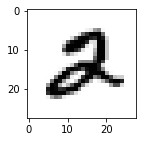

In [11]:
import matplotlib.pyplot as plt
def show(x,index):
    plt.figure(figsize=(5,2))
    plt.imshow(x[index],cmap = plt.cm.binary)
show(X_train,5)

In [12]:
X_train = X_train/255
X_test = X_test/255
x_train = X_train/255
x_train[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

**CNN MODEL CREATION**

In [13]:
cnn1 = tf.keras.Sequential([  layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                             layers.MaxPool2D((2,2)),
                             
                             layers.Flatten(input_shape = (28,28)),
                             layers.Dense(4000,activation = 'relu'),
                             layers.Dense(10,activation = 'softmax')])

In [14]:
cnn1.compile(loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'],optimizer = 'adam')
history = cnn1.fit(x_train,y_train,epochs = 5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 385s 205ms/step - loss: 0.5084 - accuracy: 0.8474 - val_loss: 11105.1367 - val_accuracy: 0.9034
Epoch 2/5
1875/1875 [==============================] - 386s 206ms/step - loss: 0.1955 - accuracy: 0.9408 - val_loss: 5385.1284 - val_accuracy: 0.9522
Epoch 3/5
1875/1875 [==============================] - 409s 218ms/step - loss: 0.1294 - accuracy: 0.9609 - val_loss: 5054.7144 - val_accuracy: 0.9583
Epoch 4/5
1875/1875 [==============================] - 467s 249ms/step - loss: 0.0978 - accuracy: 0.9702 - val_loss: 4666.8594 - val_accuracy: 0.9631
Epoch 5/5
1875/1875 [==============================] - 484s 258ms/step - loss: 0.0792 - accuracy: 0.9753 - val_loss: 3725.0520 - val_accuracy: 0.9719


**METRICS CALCULATION AND PLOTTING**

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_acc

[0.9034000039100647,
 0.9521999955177307,
 0.958299994468689,
 0.963100016117096,
 0.9718999862670898]

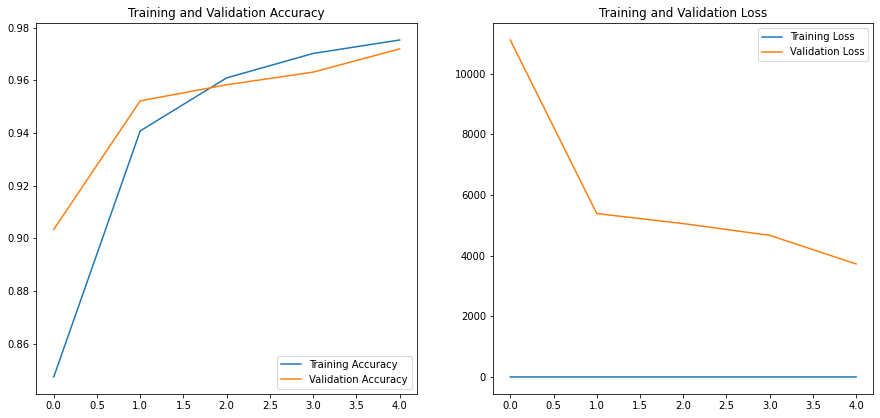

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
y_pred = cnn1.predict(x_test)
y_pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred_list = [np.argmax(i) for i in y_pred]
y_pred_list[:5]

[7, 2, 1, 0, 4]

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.96      0.99      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.96      0.98      0.97      1028
           8       0.99      0.93      0.96       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 974    0    1    1    1    0    1    1    1    0]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   6    0 1013    1    2    0    2    6    2    0]
 [   1    0    7  986    1    3    0    9    2    1]
 [   0    0    2    0  969   

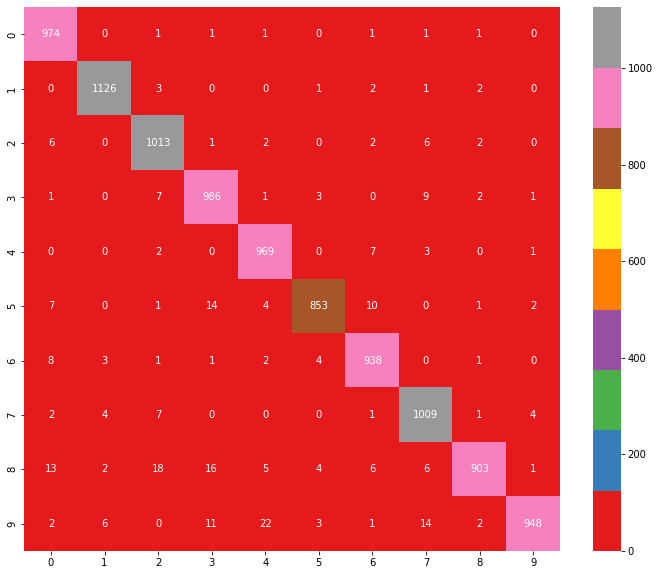

In [22]:
from sklearn import metrics
import seaborn as sns
def modelshow(x,y):
  print(metrics.classification_report(x,y))
  print(metrics.confusion_matrix(x,y))
  plt.figure(figsize=(12,10))
  sns.heatmap(metrics.confusion_matrix(x,y),annot=True,cmap='Set1',fmt='d')
modelshow(y_test,y_pred_list)

# **CONCLUSION**:

This model uses an CNN Model to predict the handwritten digits in the mnist dataset. It aslo provides an astonishing Test accuracy of 98%. I have plotted the loss and accuracy differences between test set and train set which is very small.